# Class 11: Data visualization continued

Plan for today:
- Review and discuss additional features of using matplotlib to visualize data
- If there is time: Data visualization using seaborn



In [3]:
import YData

# YData.download.download_class_code(11)   # get class code    
# YData.download.download_class_code(11, True)  # get the code with the answers 


YData.download_data("movies.csv")
YData.download_data("movie_ratings.csv")
YData.download_data("nyc23_flights.csv")
YData.download_data("nyc23_airlines.csv")


In [20]:
## You can get the fifth homework by uncommenting and running the code below.
#YData.download.download_homework(5)  # downloads the homework 

If you are using colabs, you should run the code below.

In [21]:
# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Bechdel movies revisited

The code below reads in the Bechdel into a pandas DataFrame named `movies` from a .csv file, and reduces the data to a subset of relevant columns (this is the same code as was used in previous classes, although hopefully now you understand what it is doing!). 

In [6]:

movies = pd.read_csv("movies.csv")

col_names_to_keep = ['year', 'imdb', 'title', 'clean_test', 'binary', 'budget',
       'domgross', 'budget_2013', 'domgross_2013', 'decade_code', 'imdb_id',
       'rated', 'imdb_rating', 'runtime',  'imdb_votes']

movies =   movies[col_names_to_keep]

#movies.dropna(axis = 0, how = 'any', inplace = True, subset=col_names_to_keep[0:9])

movies.head()


,year,imdb,title,clean_test,binary,budget,domgross,budget_2013,domgross_2013,decade_code,imdb_id,rated,imdb_rating,runtime,imdb_votes
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,13000000,25682380.0,13000000,25682380.0,1.0,1711425,NaN,NaN,NaN,NaN
1,2012,tt1343727,Dredd 3D,ok,PASS,45000000,13414714.0,45658735,13611086.0,1.0,1343727,NaN,NaN,NaN,NaN
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,20000000,53107035.0,20000000,53107035.0,1.0,2024544,R,8.3,134 min,"143,446"
3,2013,tt1272878,2 Guns,notalk,FAIL,61000000,75612460.0,61000000,75612460.0,1.0,1272878,R,6.8,109 min,"87,301"
4,2013,tt0453562,42,men,FAIL,40000000,95020213.0,40000000,95020213.0,1.0,453562,PG-13,7.6,128 min,"43,608"


## Data visualization continued!

Let's now continue reviewing and learnign new features for how to use matplotlib package to visualize data.


### Visualzing catagorical data with subplots

The code below recreates our `bechdel_stats` DataFrame from the `movies` DataFrame (first warm-up exercise from last class). The `bechdel_stats` that has statistics calculated separately for movies that failed and movies that passed the Bechdel test; i.e., `bechdel_stats` DataFrame has two rows, the first row for movies that failed the Bechdel test and one for movies that passed the Bechdel test. 

The `bechdel_stats` also has the following columns: 

- `mean_revenue`: The mean revenue (domgross_2013) in 2013 inflation adjusted dollars
- `mean_budget`: The mean budget (budget_2013) in 2013 inflation adjusted dollars
- `n`: The number of movies 


In [9]:
# 1: Get mean budget, mean revenue, and number of movies for movies that passed and did not pass the Bechdel test 
bechdel_stats = movies.groupby("binary").agg(n = ("title", "count"),
                                             mean_revenue = ("domgross_2013", "mean"),
                                             mean_budget = ("budget_2013", "mean"))

bechdel_stats


,n,mean_revenue,mean_budget
binary,,,
FAIL,991,1.077744e+08,6.291156e+07
PASS,803,7.959192e+07,4.627417e+07


## Subplots

There are two ways to create subplots in matplotlib using either:

1. The pyplot interface
2. The axes interface

To create subplots using the pyplot interface we can use the `subplot` function:

- `plt.subplot(num_rows, num_cols, curr_plot_num);`
- `plt.plot(x, y);`


,binary,n,mean_revenue,mean_budget
0,FAIL,991,1.077744e+08,6.291156e+07
1,PASS,803,7.959192e+07,4.627417e+07


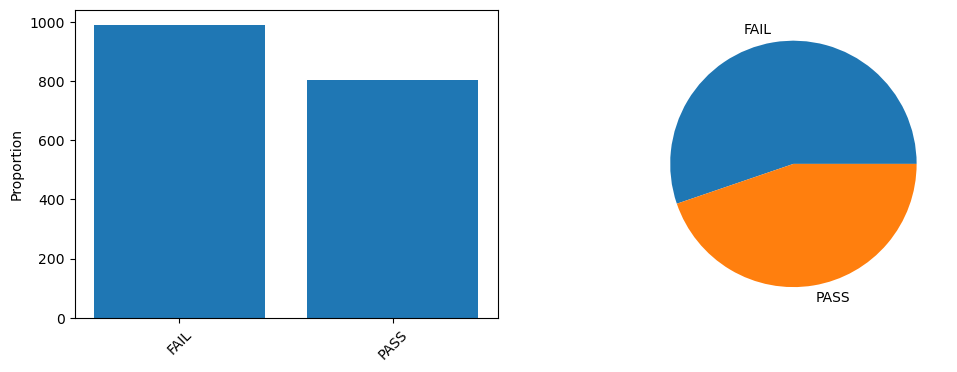

In [12]:
# reset the index to make "binary" a column in the DataFrame
bechdel_stats2 = bechdel_stats.reset_index()

display(bechdel_stats2)


# change the figure size
plt.figure(figsize = (12, 4));

# subplots
plt.subplot(1, 2, 1);
plt.bar(bechdel_stats2.binary, bechdel_stats2.n); 
plt.xticks(rotation=45)
plt.ylabel("Proportion");

plt.subplot(1, 2, 2);
plt.pie(bechdel_stats2.n, labels = bechdel_stats2.binary);


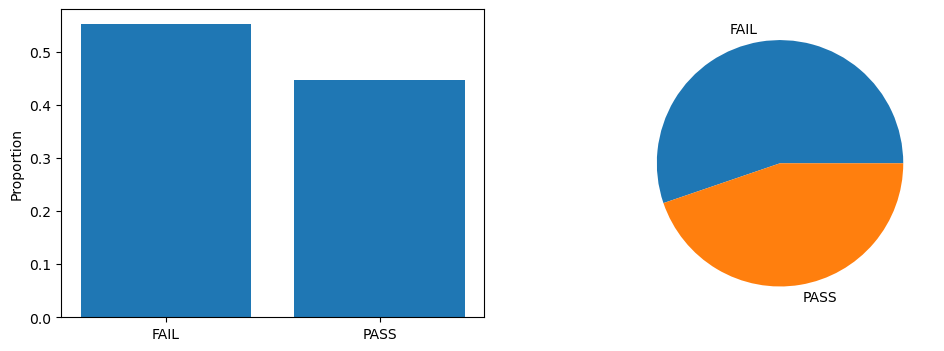

In [37]:
# using the axes interface

fig, ax = plt.subplots(1, 2);


# set the figure size
fig.set_size_inches(12, 4);
    
# subplots
ax[0].bar(bechdel_stats2.binary, bechdel_stats2.prop); 
ax[0].set_ylabel("Proportion");

ax[1].pie(bechdel_stats2.prop, labels = bechdel_stats2.binary);


## Using matplotlib as a general canvas

We can use matplotlib as a general canvas to create illustrations as well. For example, in my YData baseball class we drew a baseball diamond and updated where runners were on base.

Let's explore this very briefly...


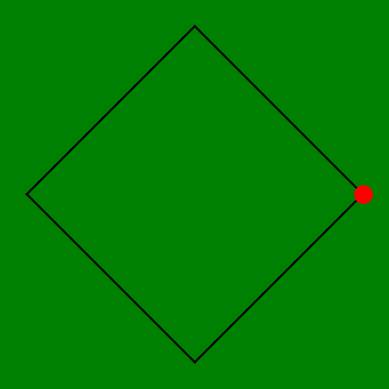

In [38]:
        
# draw the baseball diamond
plt.plot([0, 1], [0, 1], color = "black");
plt.plot([1, 0], [1, 2], color = "black");
plt.plot([0, -1], [2, 1], color = "black");
plt.plot([-1, 0], [1, 0], color = "black");

# make the axes square
plt.axis("square");

# put a runner on first
plt.plot([1], [1], color = "red", marker=".", markersize=25);

# turn off the axis
plt.axis("off");

# make the field green 
plt.gcf().set_facecolor('green')      # a better hexadecimal green: '#86eb34'

## Seaborn!

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 

I.e., it is built on top of of matplotlib but produces better looking plots that are easier to create. 

Let's start by examining different themes which can produce better looking plots. We can do this using the `sns.set_theme()` method. 


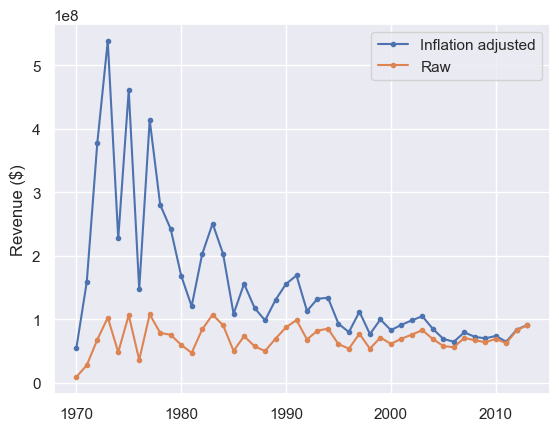

In [39]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()   # default style is 'darkgrid')
#sns.set_theme(style='whitegrid')

# Side note: Matplotlib also has themes
# plt.style.available
# plt.style.use('fivethirtyeight')


# Re-create a line plot of gas prices over time here
plt.plot(year_revenue["mean_revenue_2013"], ".-", label = "Inflation adjusted");
plt.plot(year_revenue["mean_revenue"], ".-", label = "Raw");
plt.legend();
plt.ylabel("Revenue ($)");

### Plotting relationships between two quantitative variables

We can plot relationships between two quantitative variables using the `sns.relplot()` function


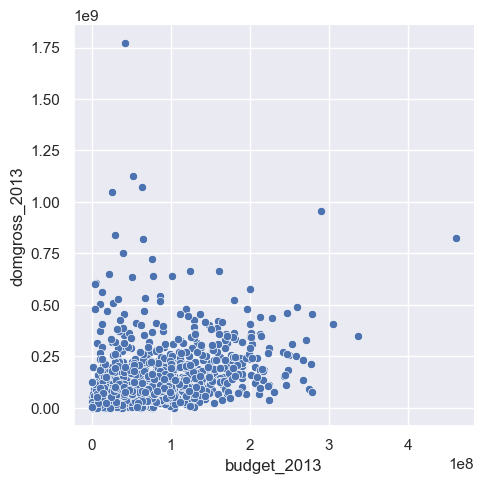

In [40]:
# plot relationship between budget and revenue (domgross_2013)
sns.relplot(data = movies, x = "budget_2013", y = "domgross_2013");

#### Penguins!

Let's continue to explore the relplot using data on penguins. 

We will also look at mapping other features of our data onto visual properties including: 
- `x`, and `y` column names to be plotted (as we have done before)
- `hue`: The column name to be mapped to the color of the points
- `size`: The column name to be mapped to the size of points
- `style`: The column name to be mapped to the style of the markers
- `col`: fThe column name to be mapped to faceting to compare multiple subplots


In [41]:
# Let's look at some penguins
penguins = sns.load_dataset("penguins")

print(type(penguins))

penguins.head()


<class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


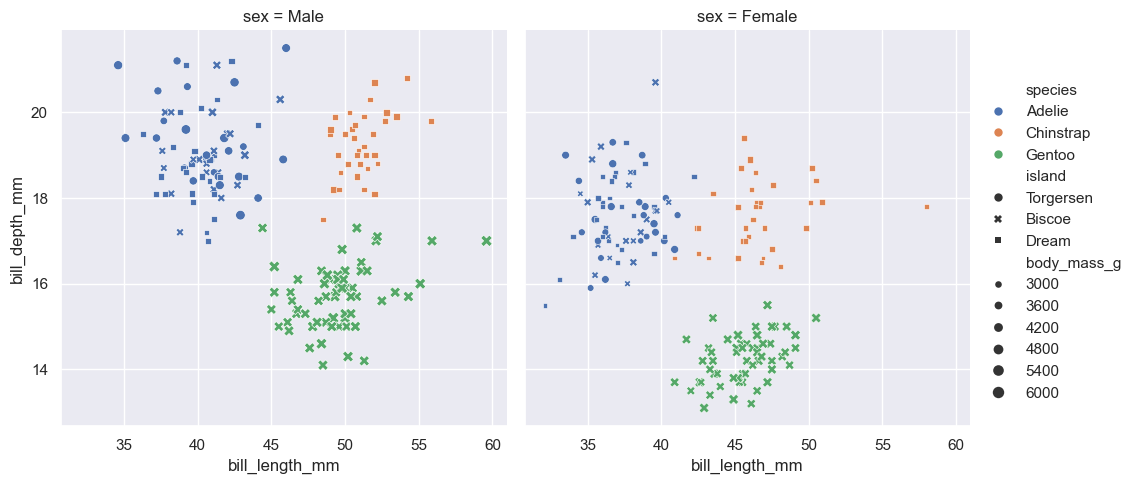

In [42]:
# plotting bill size on x, and y axes and other properties
sns.relplot(data = penguins, 
            x = "bill_length_mm", 
            y = "bill_depth_mm",
            hue = "species",
            size = "body_mass_g",
            style = "island",
            col = "sex");

### Plotting a single quantitative variable

We can plot a single quantitative variables using the `sns.displot()` function.

Properties we can set include
- `x`: The name of the data column you want to plot
- `hue`: The name of the column that colors each point
- `kind` The type of plot

Different options for `kind` are: “hist”, “kde”, “ecdf”


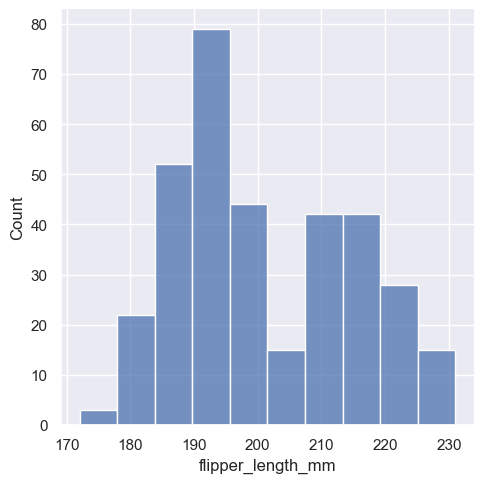

In [46]:
# plot the flipper length
sns.displot(data = penguins, 
            x="flipper_length_mm", 
            #hue="species", 
            kind="hist");

### Plotting a quantitative variable for different categorical variable levels

We can plot a quantitative variable for different categorical variable levels using the `sns.catplot()` function.

We specify: 
- `x`: Cateogoral x-value column name
- `y`: Quantitative y-value column name
- `kind`: The type of plot

The `kind` argument can be set to the following: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”


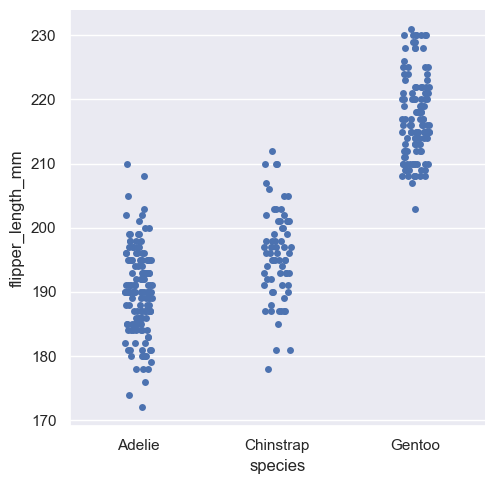

In [44]:
# plot flipper length for the different species using different kinds of plots
sns.catplot(data = penguins, 
            x = "species", 
            y = "flipper_length_mm", 
            kind = "strip");

# also try “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, or “bar”

### Pairs plots

One of the most useful visualizations for exploring the relationships between several quantitative variables is to create a "pairs plot" which creates a series of scatter plots between all quantitative variables in the data. 

We can do this in seaborn using the `sns.pairplot(data)` function!


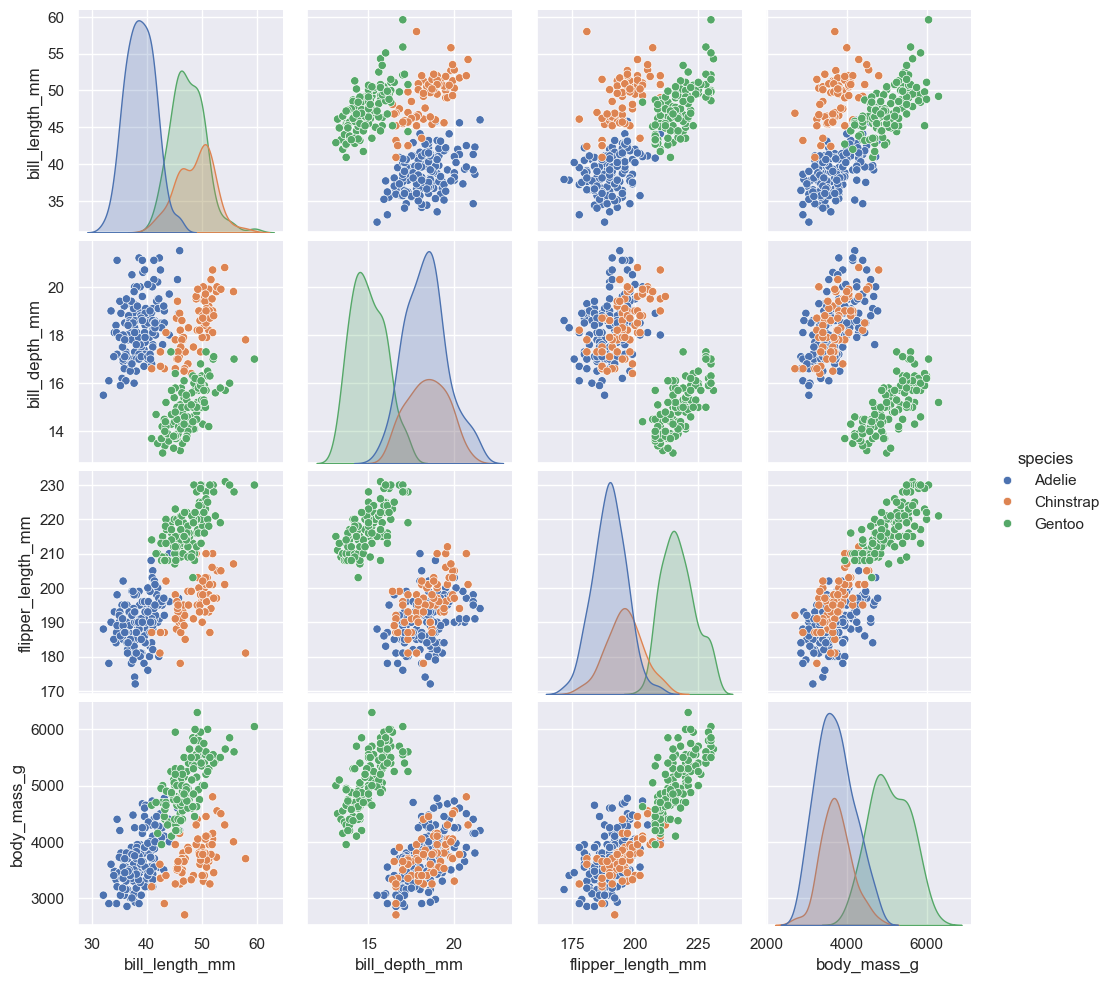

In [11]:
# Create pair plots for the different varaibles in the penguins data set

sns.pairplot(penguins, hue = "species");


<img src = "https://i.imgflip.com/1ezfdq.jpg">

## Interactive data visualizations with plotly

Let's now look at interactive visualizations using the [plotly express package](https://plotly.com/python/plotly-express/). 

Interactive visualizations can't be used with statitic report (such as the pdf used for your class project) but they are useful for exploring data to understand key trends, and these types of graphics can be embedded in webpages. 

Let's visualize our NYC flight delays dataset using interactive visualizations. The code to load the flight data and the airline names and joins them into a DataFrame called `flights_joined`. It also loads the plotly express package which we will use for our interactive visualizations.


In [19]:
import plotly.express as px

#gapminder = px.data.gapminder()   # the plotly package comes with the gapminder data
#YData.download_data("nyc23_flights.csv")
#YData.download_data("nyc23_airlines.csv")


flights = pd.read_csv("nyc23_flights.csv", index_col = "carrier", parse_dates=[18])
airline_names = pd.read_csv("nyc23_airlines.csv", index_col = "carrier")

flights_joined = flights.join(airline_names, how = "left")

flights_joined.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
carrier,,,,,,,,,,,,,,,,,,,
9E,2023,1,1,755.0,800,-5.0,1009.0,1027,-18.0,1520,N927XJ,JFK,CHS,104.0,636,8,0,2023-01-01 08:00:00,Endeavor Air Inc.
9E,2023,1,1,826.0,830,-4.0,954.0,1035,-41.0,1452,N183GJ,LGA,RDU,72.0,431,8,30,2023-01-01 08:00:00,Endeavor Air Inc.
9E,2023,1,1,832.0,835,-3.0,1141.0,1115,26.0,1403,N478PX,LGA,AVL,174.0,599,8,35,2023-01-01 08:00:00,Endeavor Air Inc.
9E,2023,1,1,845.0,850,-5.0,1046.0,1128,-42.0,1601,N309PQ,LGA,CHS,102.0,641,8,50,2023-01-01 08:00:00,Endeavor Air Inc.
9E,2023,1,1,858.0,845,13.0,1042.0,1045,-3.0,1537,N913XJ,LGA,CLE,76.0,419,8,45,2023-01-01 08:00:00,Endeavor Air Inc.


#### Data wrangling

Let's first do some data wrangling to create a DataFrame called `monthly_delays`, where each row corresponds to the month of the year for one airline, and the columns are:

- `name`: The name of the airline
- `month`: The month of the year
- `mean_arr_delay`: The mean arrival delay (for each airline for one month of the year)
- `mean_dep_delay`: The mean departure delay (for each airline for one month of the year)
- `n`: The number of flights (for each airline for one month of the year)
- `log10_n`: Log 10 of the number of flights (for each airline for one month of the year)


Hint: Try grouping the data by `month` and `name` and then using `.reset_index()` to turn these back into columns.


In [79]:
monthly_delays = flights_joined.groupby(["name", "month"]).agg(mean_arr_delay = ("arr_delay", "mean"),
                                                               mean_dep_delay = ("dep_delay", "mean"),
                                                               n = ("arr_delay", "count")).reset_index()

monthly_delays["log10_n"] = np.log10(monthly_delays.n)

monthly_delays

,name,month,mean_arr_delay,mean_dep_delay,n,log10_n
0,Alaska Airlines Inc.,1,-7.825188,11.874296,532,2.725912
1,Alaska Airlines Inc.,2,6.697628,10.610039,506,2.704151
2,Alaska Airlines Inc.,3,3.989781,6.100291,685,2.835691
3,Alaska Airlines Inc.,4,-1.293395,10.012232,651,2.813581
4,Alaska Airlines Inc.,5,-13.144949,6.839181,683,2.834421
...,...,...,...,...,...,...
160,United Air Lines Inc.,8,6.186430,14.929523,6426,3.807941
161,United Air Lines Inc.,9,6.846829,16.230844,6150,3.788875
162,United Air Lines Inc.,10,-5.887773,4.021218,6870,3.836957
163,United Air Lines Inc.,11,-6.221604,4.357201,6110,3.786041


### Line plots

Let's create a line plot showing the mean delay of each airline for each month. In particular, let's set the following properties of the plot: 

- `x`: month
- `y`: mean_arr_delay
- `color`: name
- `hover_name`: name

What do you think of this plot? 


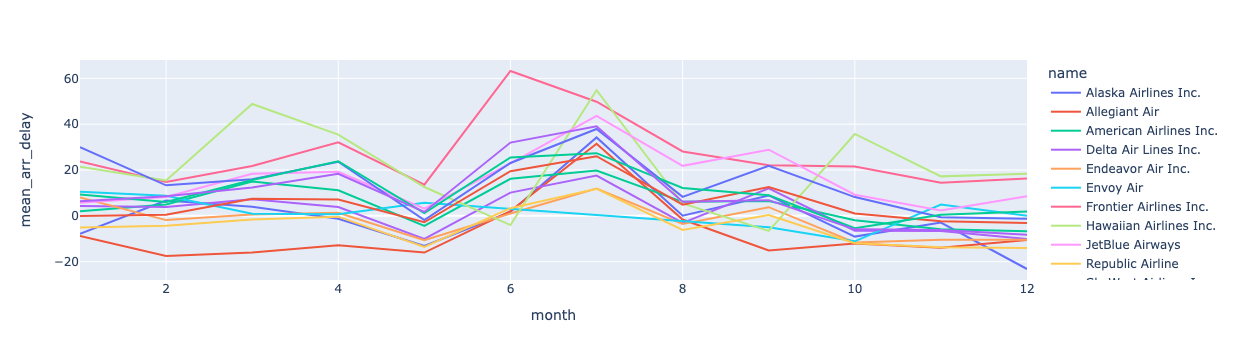

In [80]:
# Create an interactive line plot

fig = px.line(monthly_delays, 
              x="month", 
              y="mean_arr_delay", 
              color="name", 
              hover_name="name",
              #line_shape="spline", 
              render_mode="svg")

fig.show()

### Scatter plots

Let's create a scatter plot of the mean arrival delays as a function of the mean departure delays. To do this we can use the `px.scatter(data_frame = , x = , y = , ...)` method which works similar to seaborn's `sns.relplot()` function, where each point on the plot corresponds to one airline for one month of the year.

Let's try out the `px.scatter(data_frame = , x = , y = , ...)` function use the following mappings: 

- `x`: The mean departure delay
- `y`: The mean arrival delay
- `size`:  The number of flights (or log10 of the number of flights)
- `color`: The name of the airline 
- `hover_name`: The name of the airline

If we want to have separate facets for columns we can use `facet_col`. Experiment setting this to the name of the month or the name of the airline.



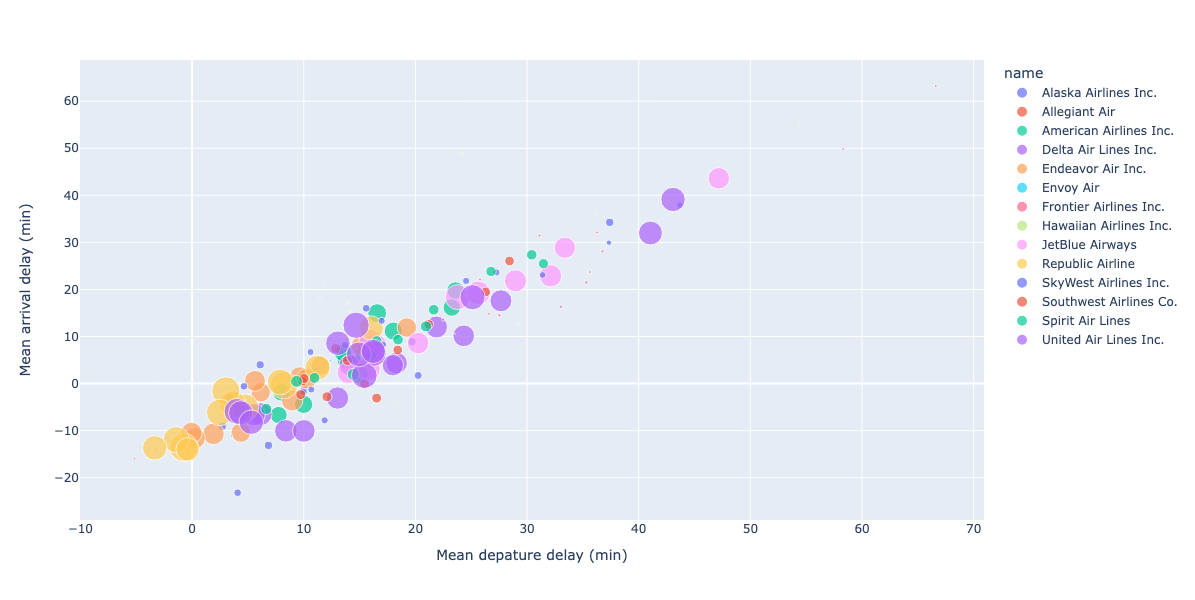

In [74]:
fig = px.scatter(data_frame = monthly_delays, 
                 x="mean_dep_delay", 
                 y="mean_arr_delay",
                 #size="n", 
                 size="n",  # log10_n
                 color="name",
                 hover_name="name",
                 #facet_col = "name"  # "month"
                 width=1000, height=600
      )

fig.update_layout(xaxis_title="Mean depature delay (min)",
                 yaxis_title="Mean arrival delay (min)")


fig.show()

### Animations

We can also add animations to out plots using the following arguments:

- `animation_frame`: defines which variable to animate over; i.e., each frame in the animation will be one value of this variable.

- `animation_group`: Values from this columns are used to provide object-constancy across animation frames: rows with matching `animation_group`s will be treated as if they describe the same object in each frame. This allows the animation to smoothly interpolate between frames. 

We can also set the x and y ranges of our plots to match the ranges of data over the full animation sequence. 

- `range_x`: The range that the x-values should take
- `range_y`: The range that the y-values should take


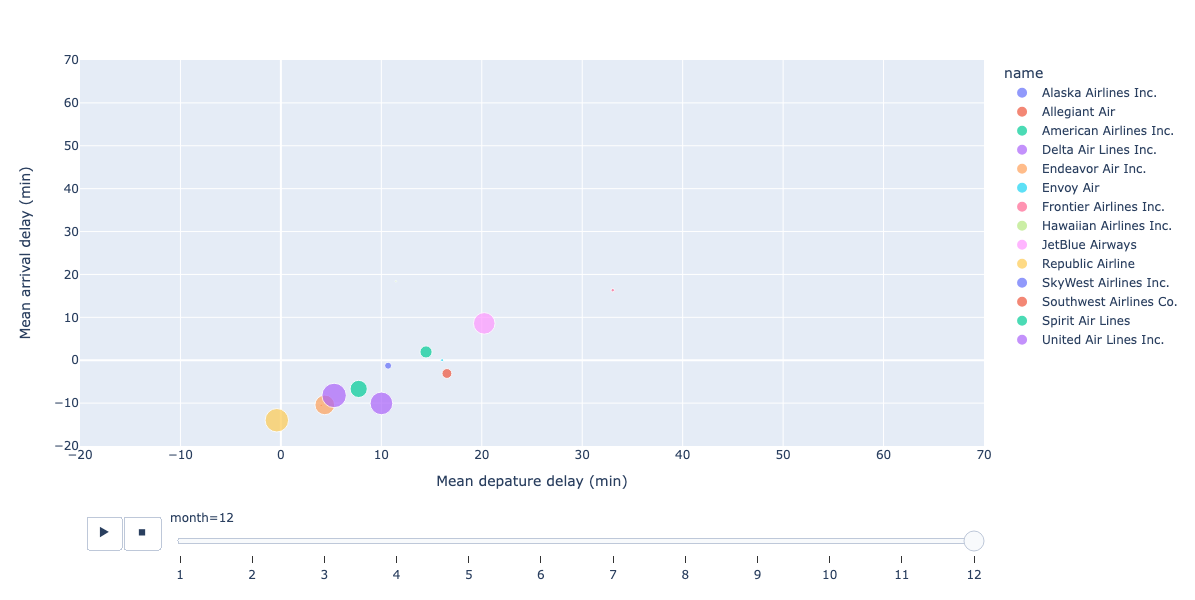

In [75]:
fig = px.scatter(data_frame = monthly_delays, 
                 x="mean_dep_delay", 
                 y="mean_arr_delay", 
                 #size="n", 
                 size="n", 
                 color="name",
                 hover_name="name",
                 animation_frame="month", 
                 animation_group="name",
                 range_x = [-20, 70],
                 range_y = [-20, 70],
                 width=1000, height=600
          )

fig.update_layout(xaxis_title="Mean depature delay (min)",
                 yaxis_title="Mean arrival delay (min)")

fig.show()

### If there is time...

Explore more on your own!

